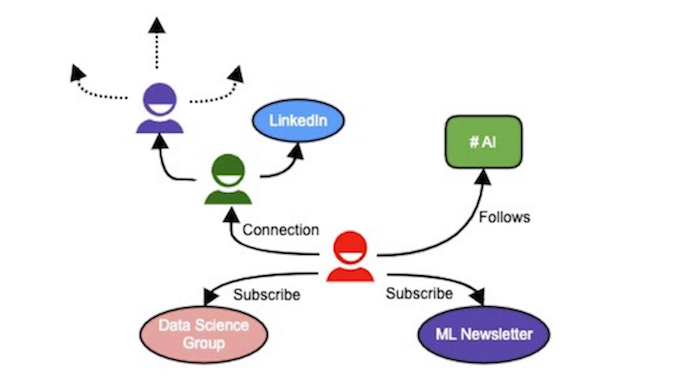

## Leveraging Graph Theory for Friend Recommendation in Social Networks
This code powers an application that uses graph theory for friend recommendation in social networks. By creating a network graph of users and their connections, it visually highlights mutual connections and potential new friends. When a user is selected, mutual friends are emphasized, showcasing the power of network analysis in strengthening social bonds. This approach has immense benefits for enhancing user experience and engagement on social platforms. The next step is to integrate real-time social network data, further refining the friend recommendation engine to be more dynamic and responsive to changing social landscapes.

### Import libraries

In [1]:
import dash
import dash_cytoscape as cyto
from dash import html
from dash.dependencies import Input, Output
import networkx as nx
import random

### Building a Social Network Graph with Dash and NetworkX
The code initializes a Dash web application and creates a social network graph using NetworkX. It adds nodes to represent individual users and edges to signify connections between them, with a focus on Alice as the most connected individual, hinting at her role as a central influencer in the network.

In [2]:
# Create the dash application
app = dash.Dash(__name__)

# Create the network
G = nx.Graph()

# Add nodes (representing users)
users = ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'George', 'Hannah', 'Ian', 'Jane', 
         'Kevin', 'Laura', 'Mandy', 'Nigel', 'Oscar', 'Paul', 'Quinn', 'Rachel', 'Steve', 'Tina']
G.add_nodes_from(users)

# Add edges (representing connections between users)
connections = [
    # Connections are made in a way that Alice has the most connections (making her the influencer)
    ('Alice', 'Bob'),
    ('Alice', 'Charlie'),
    ('Alice', 'David'),
    ('Alice', 'Eve'),
    ('Alice', 'Frank'),
    ('Alice', 'George'),
    ('Alice', 'Hannah'),
    ('Laura', 'Ian'),
    ('Alice', 'Jane'),
    ('George', 'Kevin'),
    ('Alice', 'Laura'),
    ('Laura', 'George'),
    ('Alice', 'Nigel'),
    ('Alice', 'Oscar'),
    ('Laura', 'Paul'),
    ('Alice', 'George'),
    ('Alice', 'Rachel'),
    ('Steve', 'Steve'),
    ('Alice', 'Tina'),
    ('Bob', 'Charlie'),
    ('David', 'Eve'),
    ('Frank', 'George'),
    ('Steve', 'Ian'),
    ('Jane', 'Kevin'),
    ('Laura', 'Mandy'),
    ('Steve', 'Oscar'),
    ('Paul', 'Quinn'),
    ('Rachel', 'Steve'),
    ('Tina', 'Bob')
]
G.add_edges_from(connections)

### Interactive Network Visualization Using Dash and Cytoscape
This code snippet transforms data from a NetworkX graph into a format suitable for Dash Cytoscape, creating an interactive network visualization component. The component displays nodes and edges with customized styles, and it's integrated into a Dash web app layout for interactive exploration of the graph structure.

In [3]:
# Convert Networkx graph data to Dash Cytoscape data
elements = [{'data': {'id': node, 'label': node}} for node in G.nodes]
elements.extend([{'data': {'source': edge[0], 'target': edge[1]}} for edge in G.edges])

# Create Dash Cytoscape component
cytoscape_component = cyto.Cytoscape(
    id='cytoscape',
    elements=elements,
    layout={'name': 'grid'},
    style={'width': '100%', 'height': '800px'},
    stylesheet=[
        {
            'selector': 'node',
            'style': {
                'label': 'data(id)',
                'background-color': 'blue'
            }
        },
        {
            'selector': 'edge',
            'style': {
                'line-color': 'blue',
                'width': 0.5
            }
        },
    ]
)



### Dynamic Visualization of Mutual Connections in Social Networks
The generate_stylesheet function dynamically updates the visual style of a social network graph in a Dash application. When a user node is selected, it modifies the graph to highlight that user in red, their mutual connections in green, and the connecting edges in red. This visual approach makes identifying mutual friends in a social network intuitive and interactive.

In [4]:

app.layout = html.Div([
    cytoscape_component
])

@app.callback(Output('cytoscape', 'stylesheet'),
              Input('cytoscape', 'tapNodeData'))
def generate_stylesheet(data):
    if not data:
        return [
            {
                'selector': 'node',
                'style': {
                    'label': 'data(id)',
                    'background-color': 'blue'
                }
            },
            {
                'selector': 'edge',
                'style': {
                    'line-color': 'blue',
                    'width': 0.5
                }
            },
        ]
    
    mutual_friends = set(nx.neighbors(G, data['id']))
    stylesheet = [
        {
            'selector': 'node',
            'style': {
                'label': 'data(id)',
                'background-color': 'blue',
                'opacity': 0.3
            }
        },
        {
            'selector': 'edge',
            'style': {
                'line-color': 'blue',
                'opacity': 0.3,
                'width': 0.5
            }
        },
        {
            'selector': f'node[id = "{data["id"]}"]',
            'style': {
                'background-color': 'red',
                'opacity': 1
            }
        },
    ]
    
    for friend in mutual_friends:
        stylesheet.append({
            'selector': f'node[id = "{friend}"]',
            'style': {
                'background-color': 'green',
                'opacity': 1
            }
        })
        stylesheet.append({
            'selector': f'edge[source = "{data["id"]}"][target = "{friend}"], edge[target = "{data["id"]}"][source = "{friend}"]',
            'style': {
                'line-color': 'red',
                'opacity': 1,
                'width': 2
            }
        })
        
    return stylesheet

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)
